<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_17(1)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링
==
## kMeans, DBSCAN 비교
데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

### 코랩에서 한글 폰트 설치

In [37]:
# 코랩을 사용하는 경우만 실행

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

## 여기서 런타임 - 런타임 다시 시작을 실행한 후에 위의 코드를 다시한번 실행하여야 한다

## 한글 설치

In [38]:
import matplotlib.pyplot as plt
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
    
%config InlineBackend.figure_format = 'retina'

필요한 라이브러리(모듈) 설치
--

In [39]:
import pandas as pd
import numpy as np
import matpl otlib.pyplot as plt
%matplotlib inline

In [40]:
# 데이터 다운로드
!curl -L https://goo.gl/Cx8Rzw -o power.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:09 --:--:--     0
  0     0    0     0    0     0      0      0 --:--

데이터 읽기
--

In [41]:
power_data = pd.read_excel('power.xls')
print(power_data.shape)

(19, 28)


In [42]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [43]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [44]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'])
power = power.drop('합계', axis=1)

In [45]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

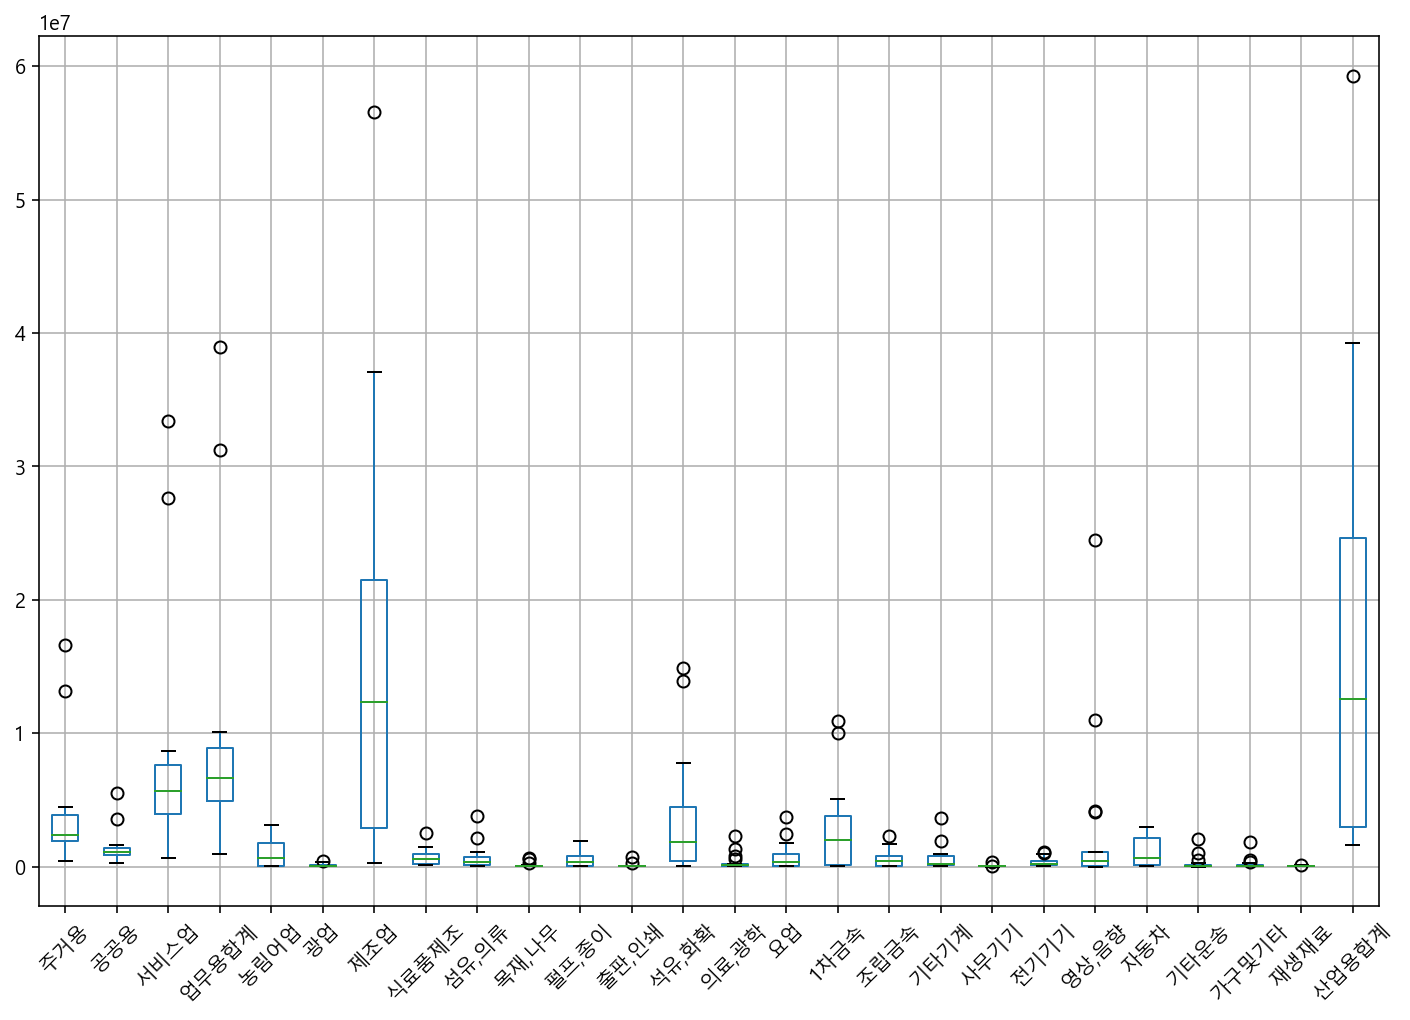

In [46]:
power.boxplot(figsize=(12,8))
plt.xticks(rotation=45)

<AxesSubplot:>

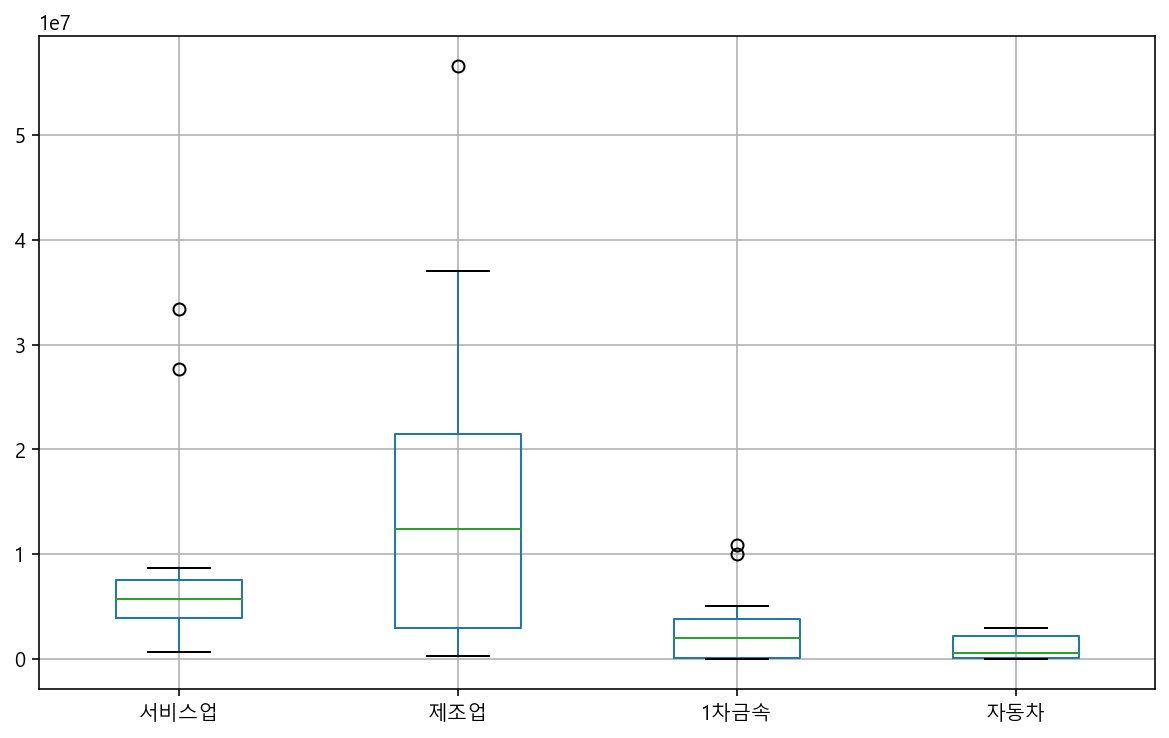

In [47]:
power[['서비스업','제조업', '1차금속', '자동차']].boxplot(figsize=(10,6))

<AxesSubplot:ylabel='구분'>

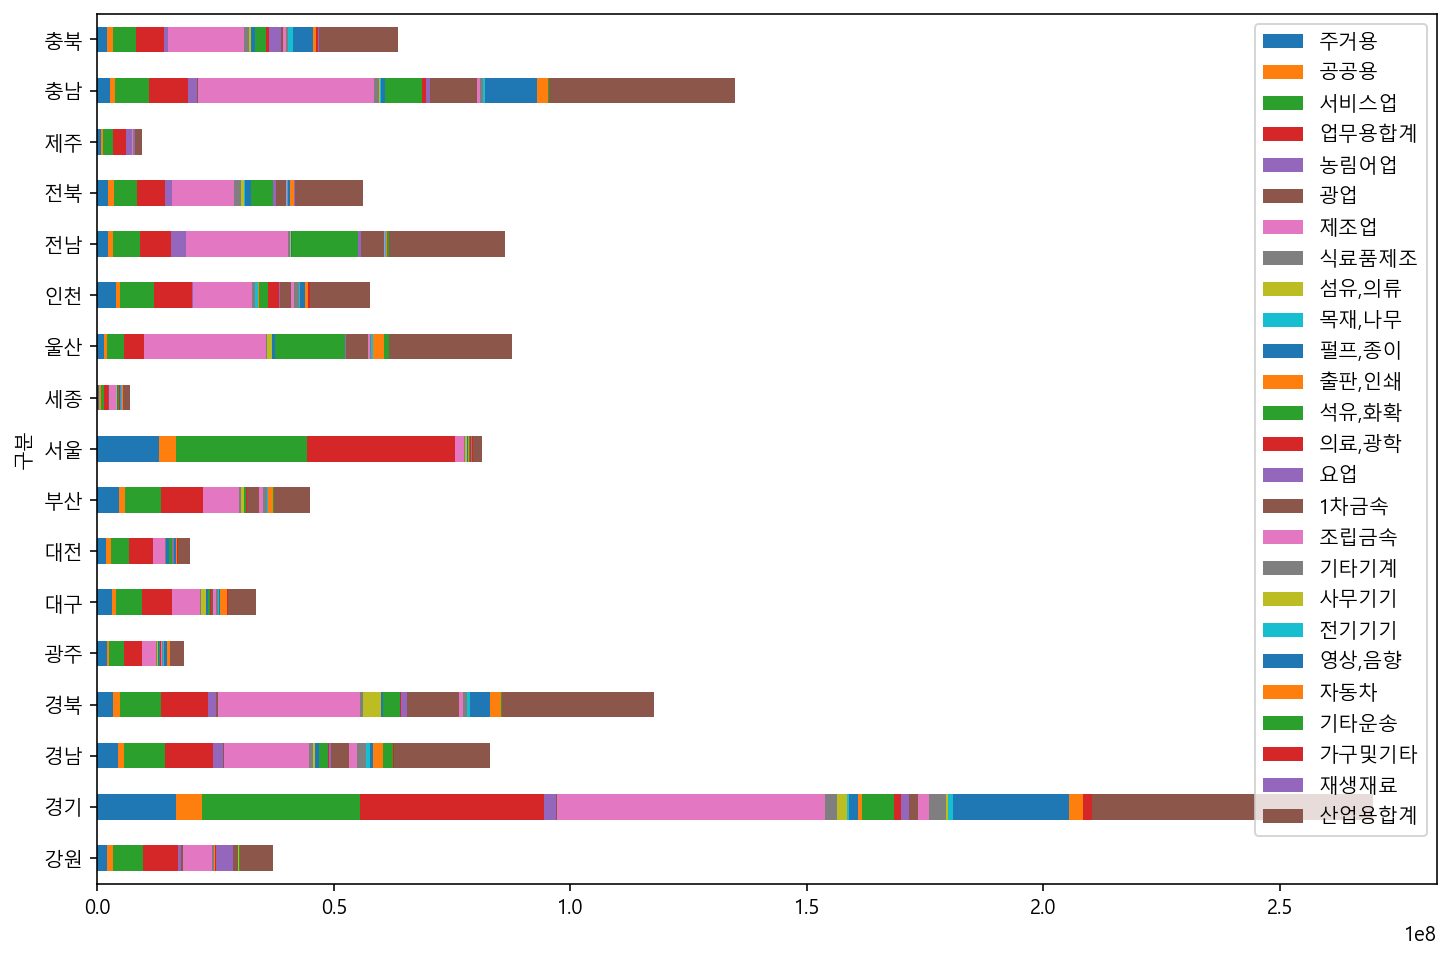

In [48]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

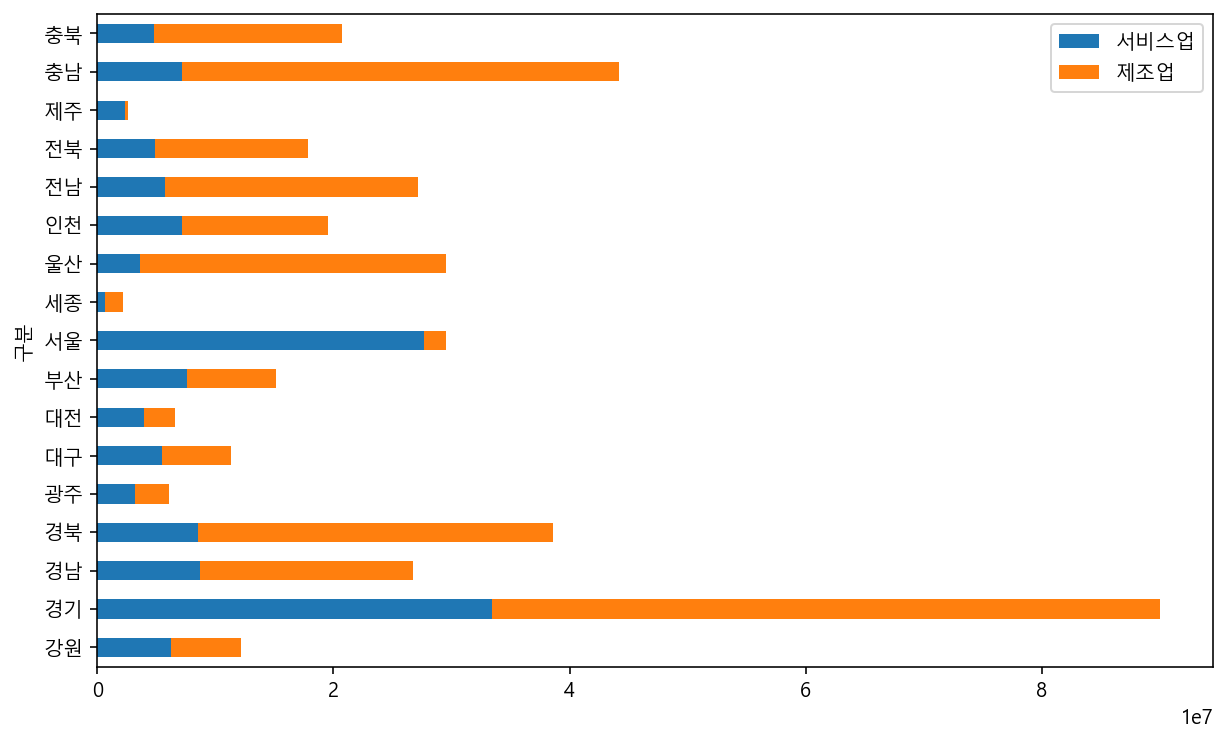

In [49]:
features = ['서비스업', '제조업']
power[features].plot(kind='barh', figsize=(10,6), stacked=True)

In [50]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


스캐터 플롯
--

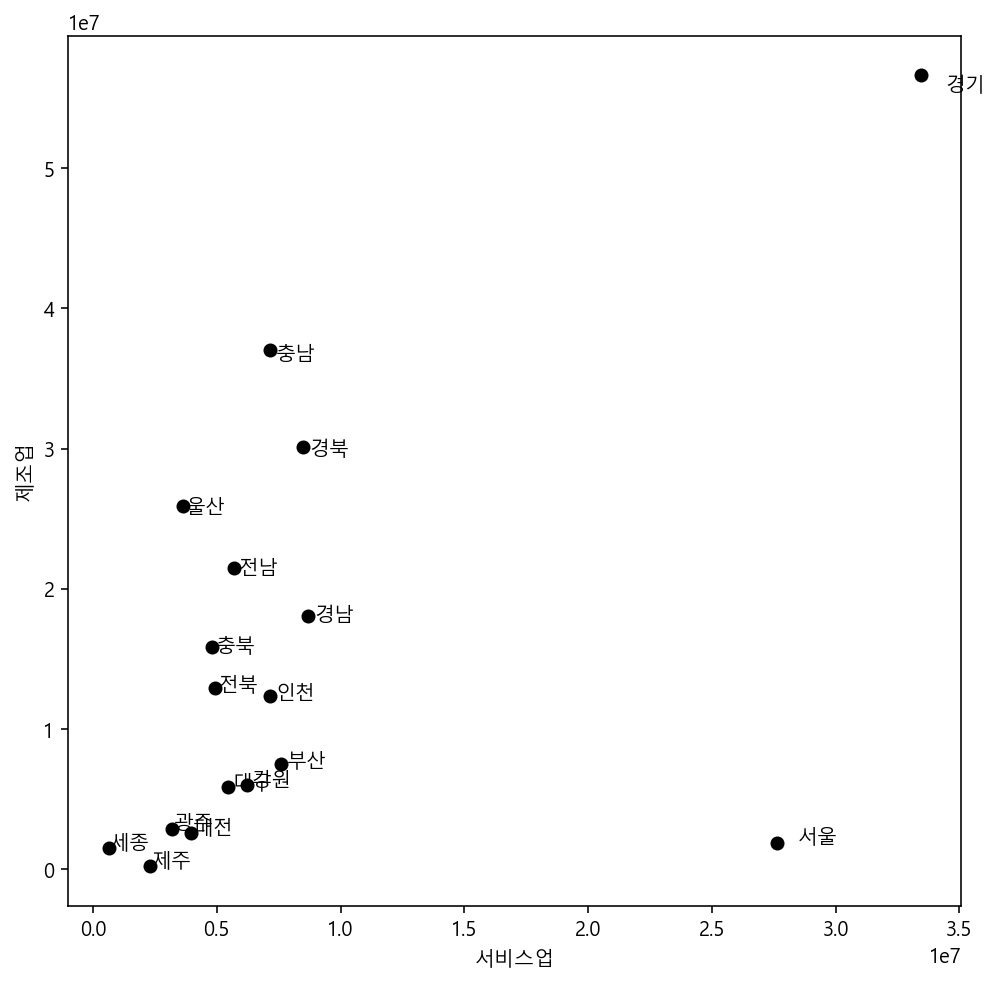

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

### 아웃라이어

In [52]:
power = power.drop(['경기', '서울'])

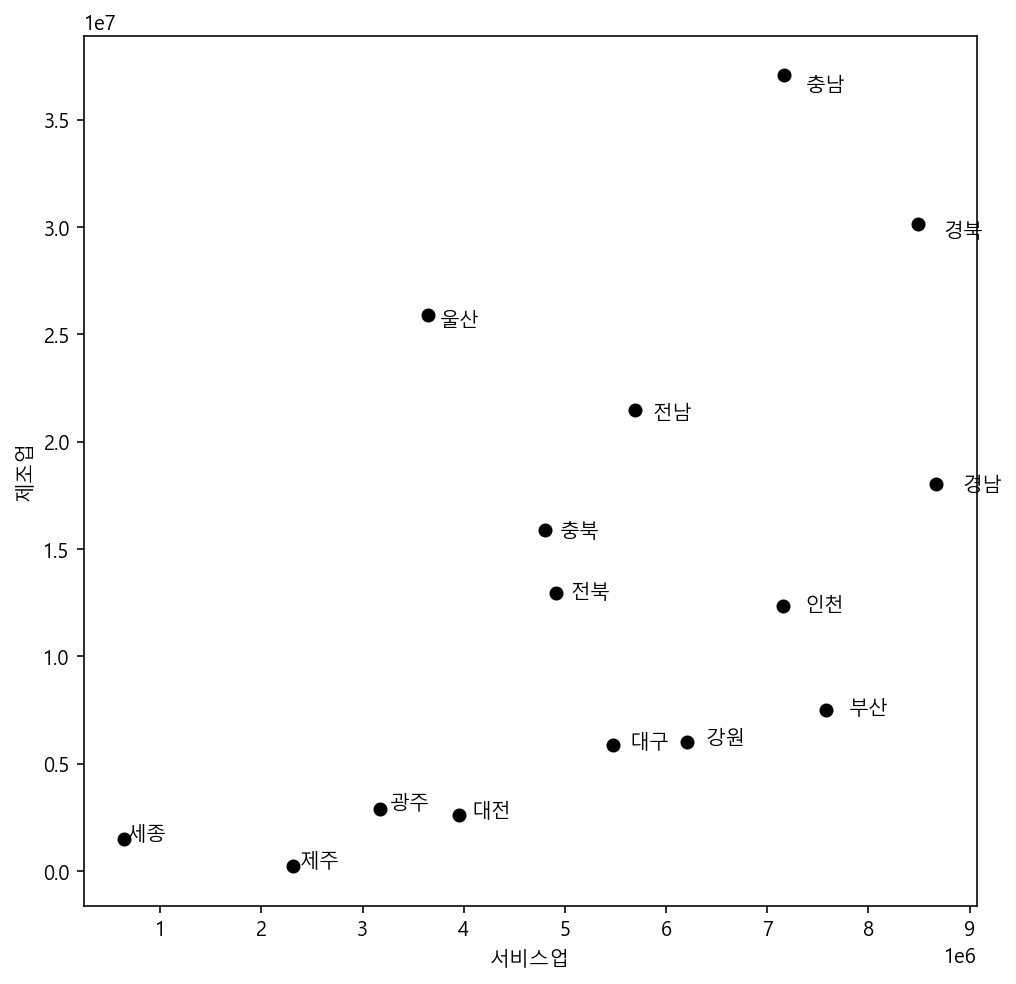

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# 클러스터링

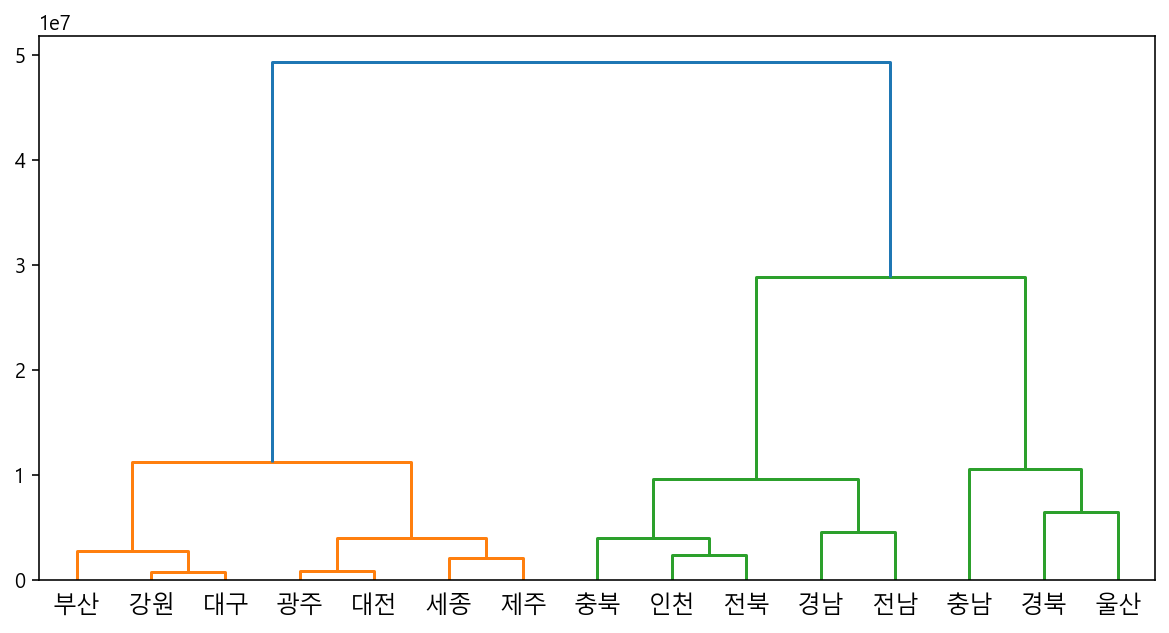

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

In [55]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=6).fit(power)
print(k.n_clusters)

6


In [56]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,5
경남,8667737,18053778,1
경북,8487402,30115601,3
광주,3174973,2910768,0
대구,5470438,5862633,5
대전,3955921,2608343,0
부산,7582169,7512588,5
세종,645424,1502922,0
울산,3649386,25883132,3


In [57]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [58]:
centers = k.cluster_centers_ ; centers

array([[ 2521262.5       ,  1815892.5       ],
       [ 7179198.        , 19753852.        ],
       [ 7164439.        , 37057955.        ],
       [ 6068394.        , 27999366.5       ],
       [ 5623124.        , 13739046.33333333],
       [ 6418785.33333333,  6459169.        ]])

In [106]:
k.labels_

array([0, 2, 3, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 3, 2])

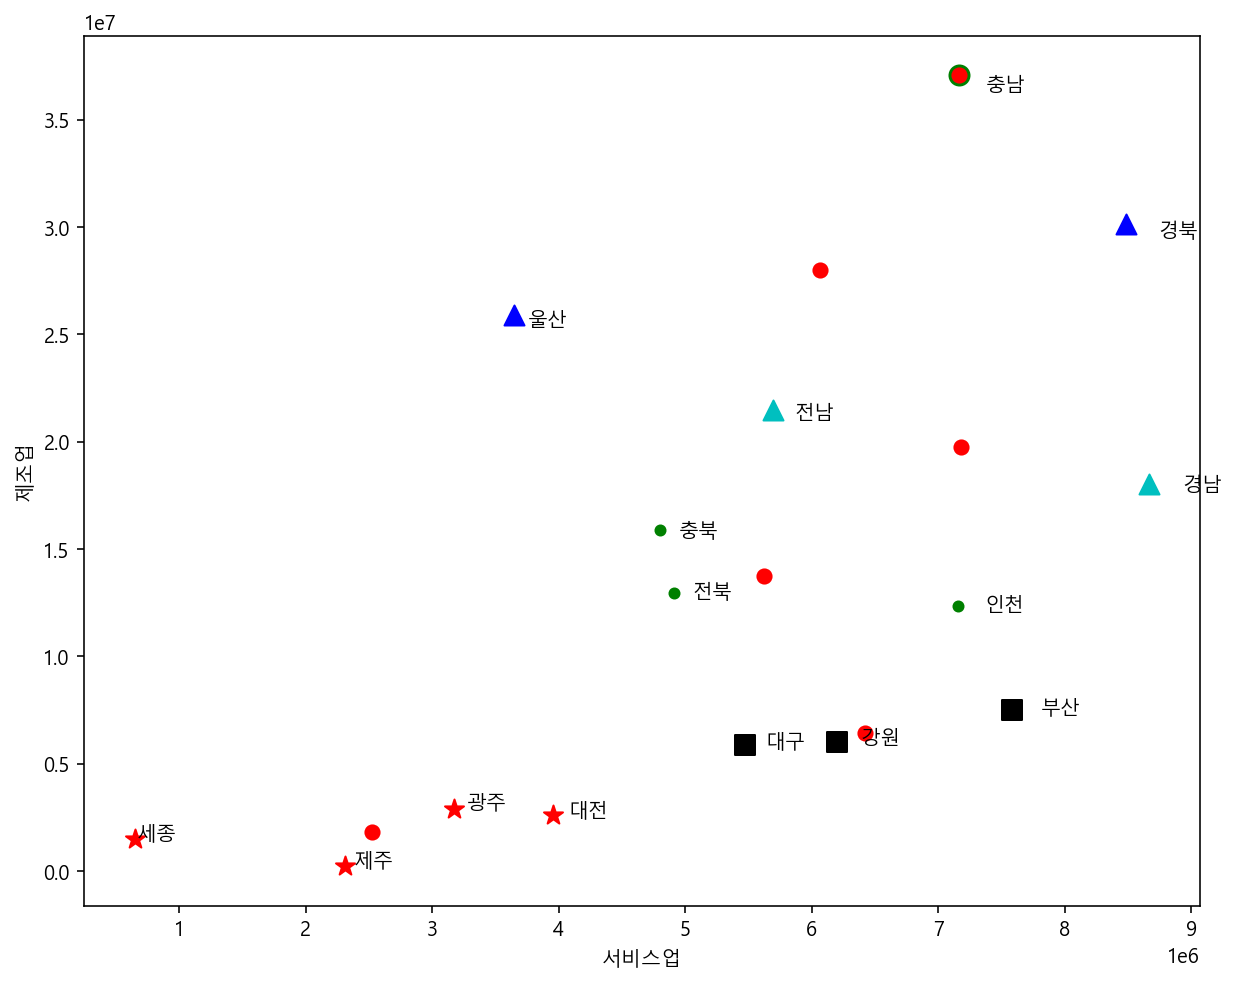

In [59]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


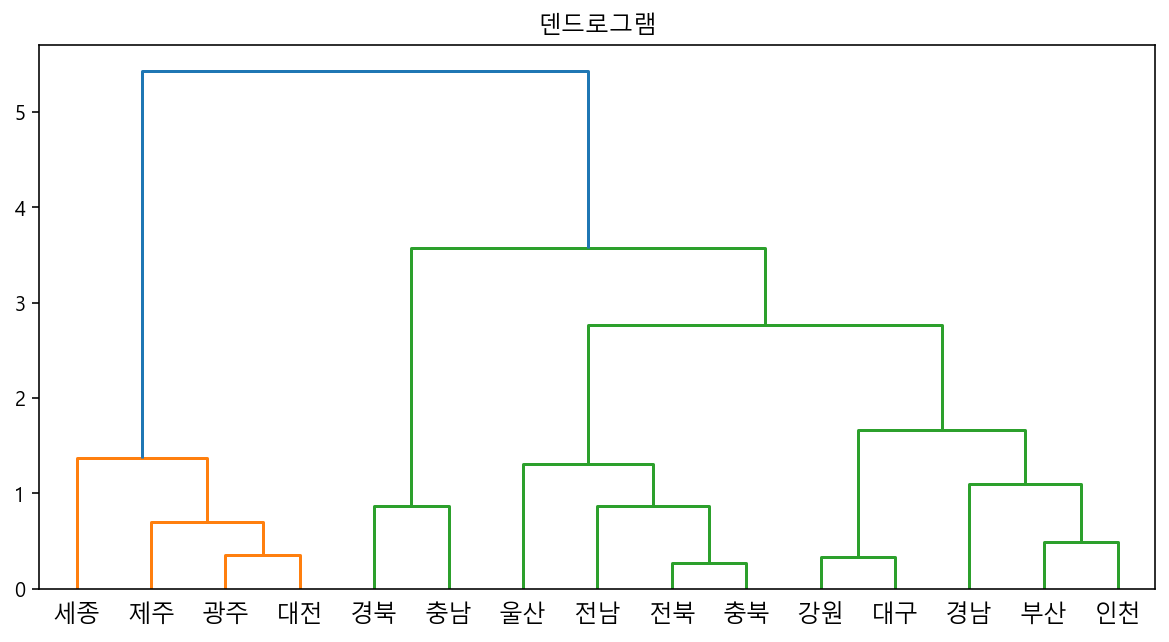

In [61]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [62]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

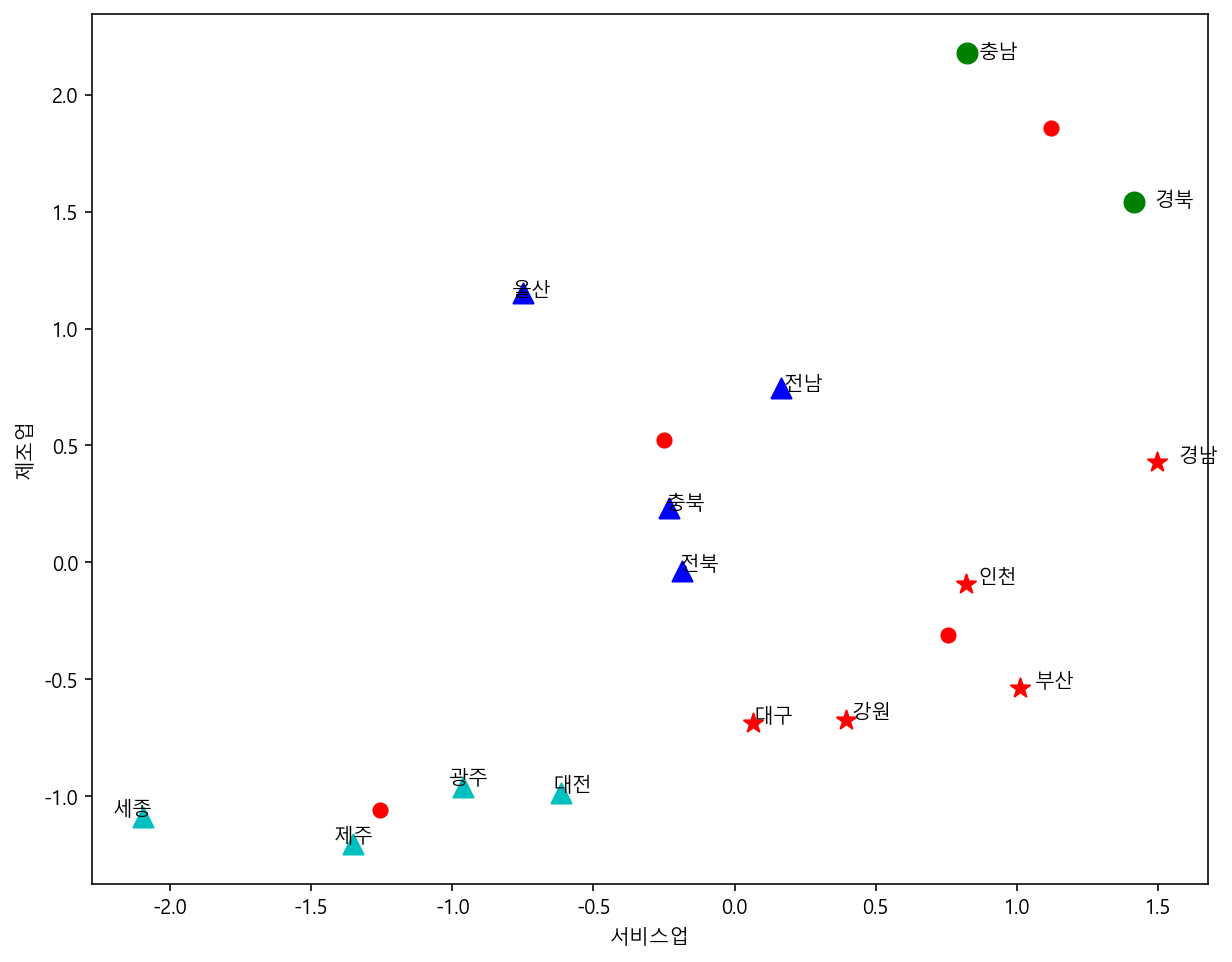

In [63]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [64]:
# 모든 특성 고려
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [65]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [66]:
power2

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,...,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,...,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,...,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,...,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626


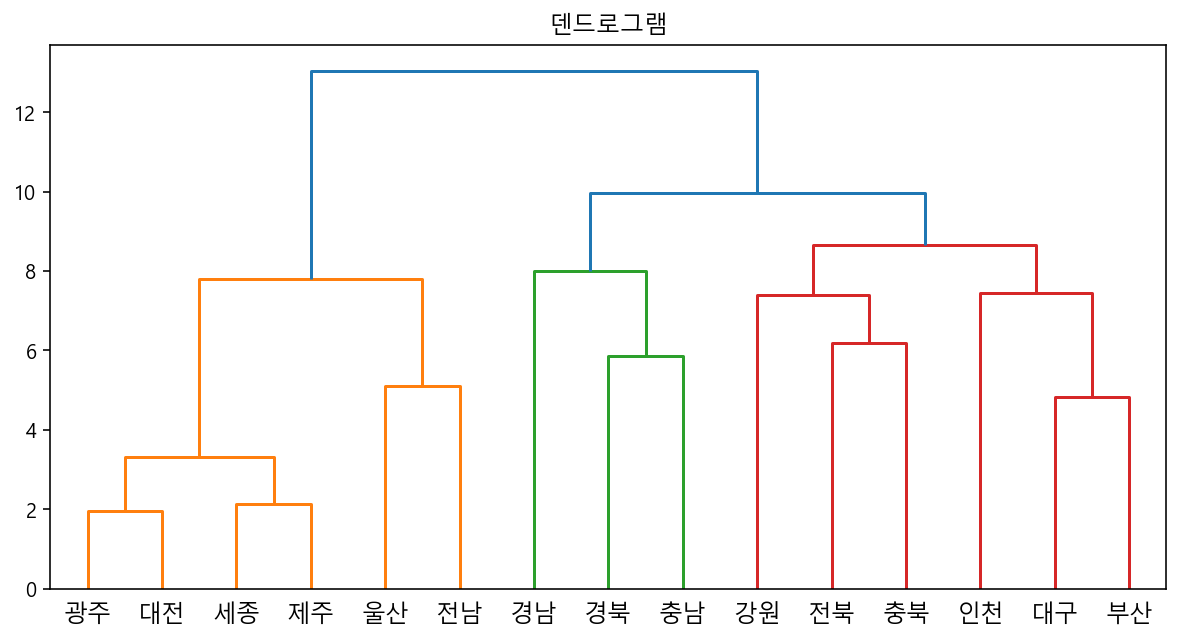

In [67]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power3.index)
plt.show()

15


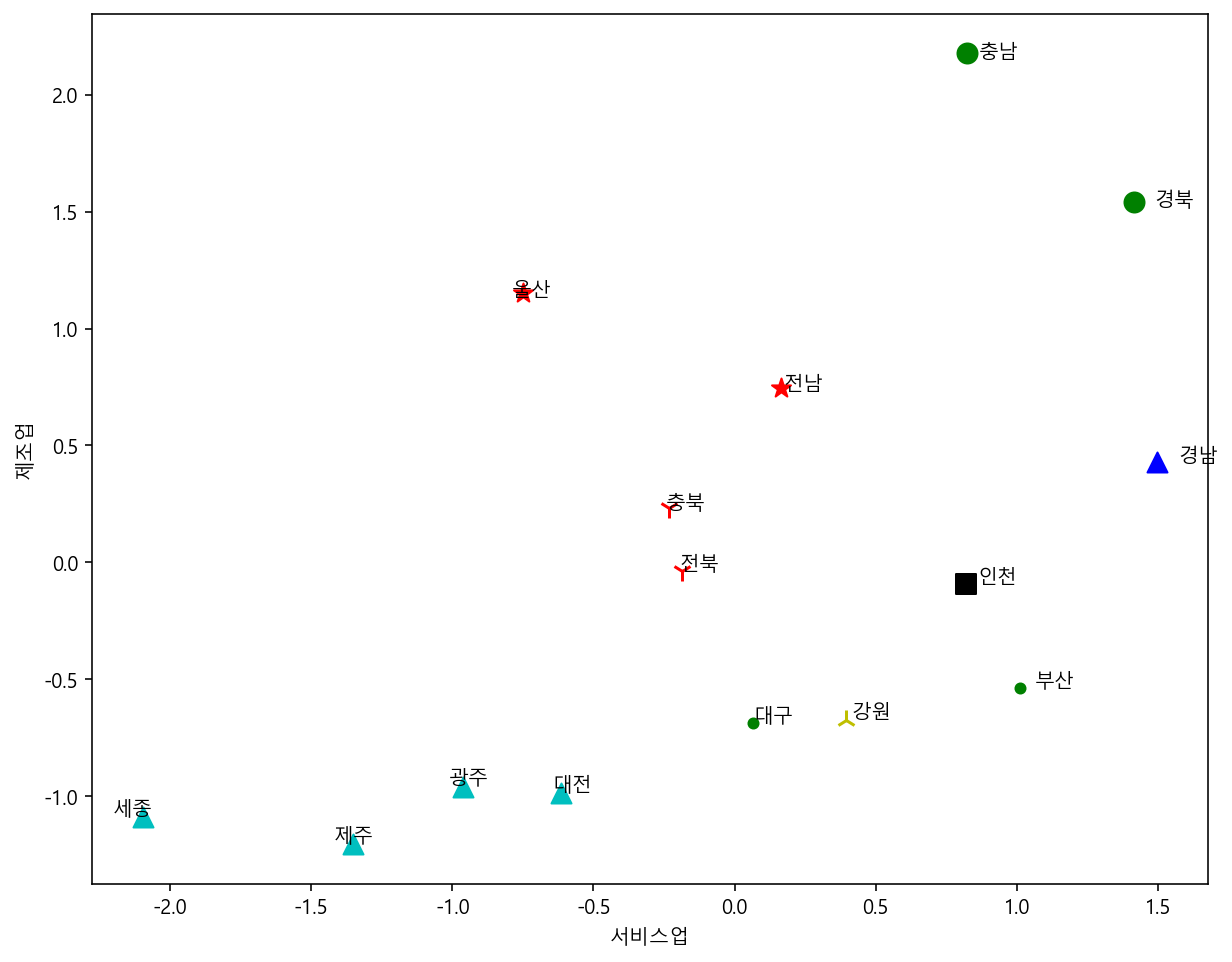

In [68]:
k = KMeans(n_clusters=8).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])
    

In [69]:
power3

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,-0.447461,1.107363,0.393992,-0.316151,2.742496,-0.676282,-0.050383,-0.616388,-0.451440,-1.067457,...,-0.545482,-0.948359,-0.828941,-0.656697,-0.830062,-0.527178,-0.976346,-0.336181,-0.556318,-0.886117
경남,1.578961,1.176534,1.498349,1.305632,0.008994,0.431200,0.885979,-0.251316,-0.199913,1.028648,...,0.272688,2.649920,2.895248,-0.222754,1.809963,-0.354695,1.289121,3.279342,1.110336,0.677332
경북,0.741750,1.560268,1.417523,0.888898,1.171658,1.539632,-0.003216,3.501870,-0.123130,-0.175988,...,2.359112,0.988392,0.661467,0.236074,1.293236,0.926336,1.511864,-0.307656,-0.239826,1.717722
광주,-0.435282,-1.020610,-0.963503,-0.878909,-0.832773,-0.960380,-0.985356,-0.307126,-0.527273,-1.021363,...,-0.829919,-0.694982,-0.502382,-0.373569,-0.238525,-0.287994,-0.534146,-0.529049,-0.552847,-0.439775
대구,0.610246,-0.355709,0.065323,-0.884685,-0.806008,-0.689116,-0.860335,0.525262,-0.469421,0.045628,...,-0.758493,0.399217,0.130952,3.389922,-0.406647,-0.453754,0.429803,-0.411663,-0.363103,0.180989
대전,-0.506892,-0.028737,-0.613482,-0.927483,-0.828903,-0.988171,-0.880839,-0.585057,-0.542427,0.293170,...,-0.835579,-0.883638,-0.743391,-0.590002,-0.694371,-0.375678,-0.860175,-0.528492,-0.430911,-0.927319
부산,1.764586,0.866387,1.011798,-0.843699,-0.630305,-0.537491,-0.083553,-0.052856,-0.250080,-1.059906,...,-0.135670,0.857876,0.903875,-0.449156,-0.622550,-0.510761,0.058538,-0.107861,-0.310237,-0.543843
세종,-1.806555,-1.698213,-2.097244,-0.884340,-0.711008,-1.089755,-1.108696,-0.553430,-0.560746,-0.204725,...,-0.842723,-1.009226,-0.846642,0.225388,-0.843536,-0.482711,-1.014542,-0.538628,-0.607990,-0.914916
울산,-0.843818,-1.213457,-0.750871,-0.872977,-0.677199,1.150686,-0.920690,0.400589,-0.493517,0.507522,...,0.527077,-0.181218,-0.561629,-0.439116,0.193389,-0.534153,1.523243,1.363437,-0.608978,-0.949440


## 클러스터링 비교

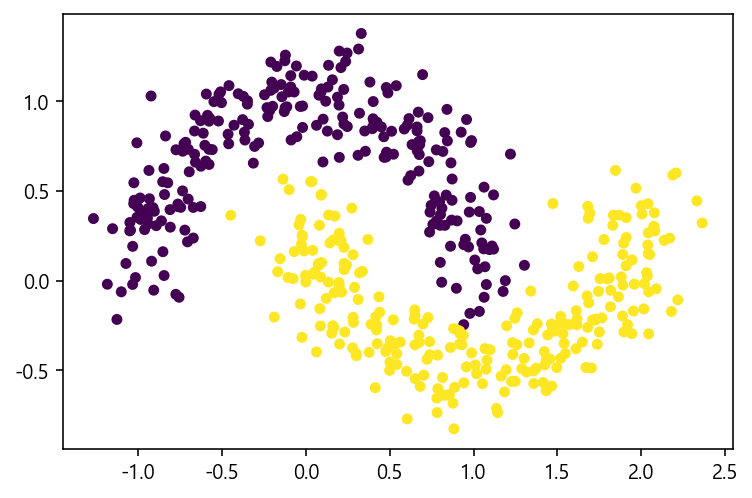

In [70]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=500, noise=0.15, random_state=11)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.show()

In [71]:
y

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

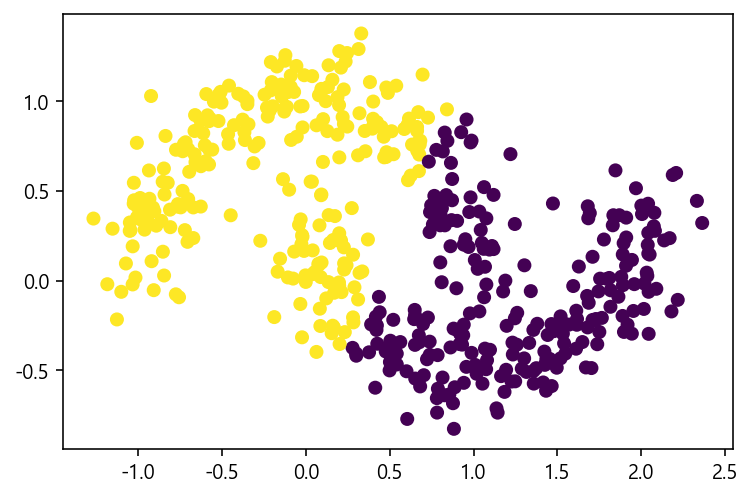

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

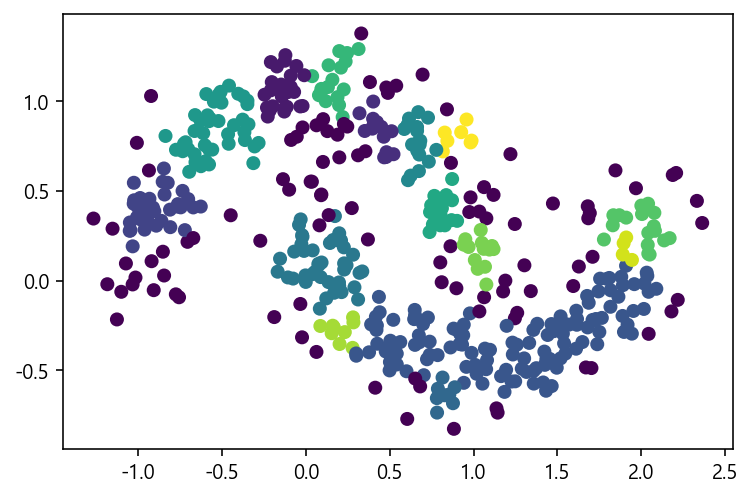

In [73]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

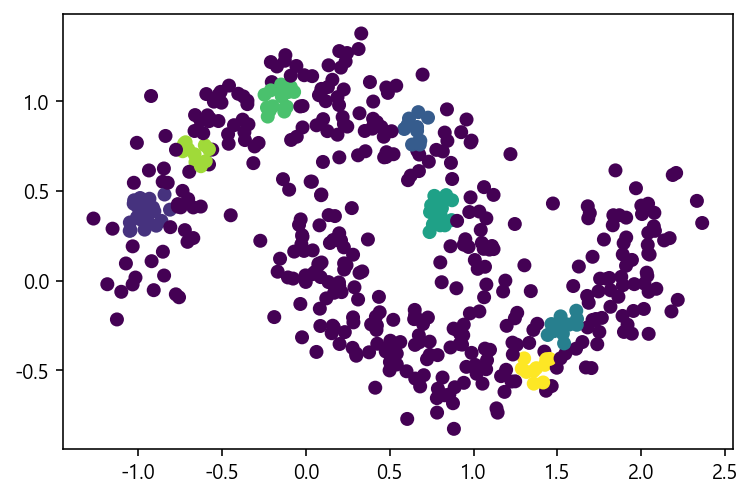

In [74]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

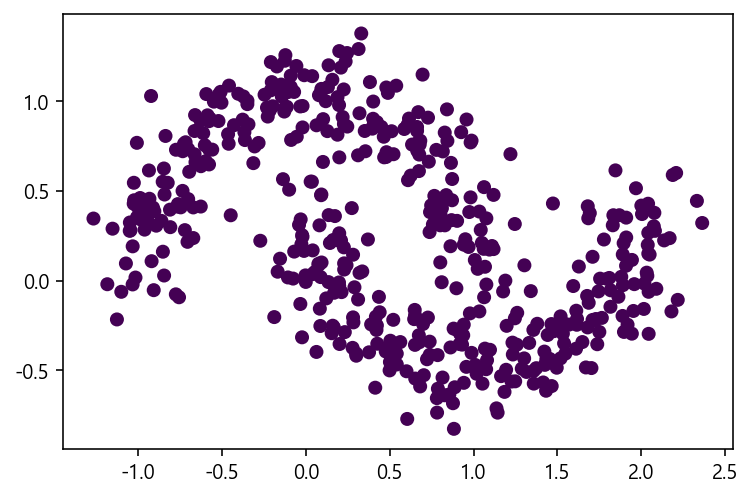

In [75]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

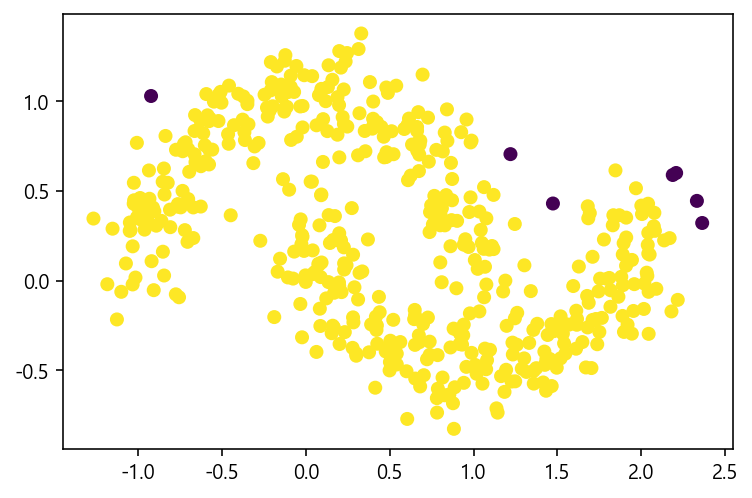

In [76]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

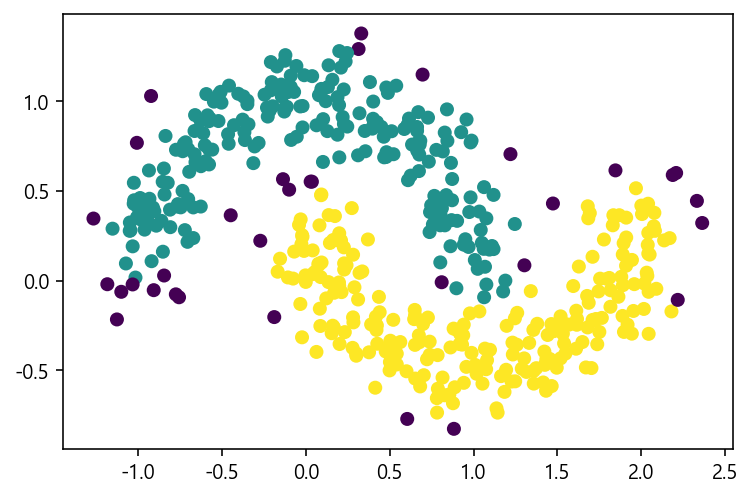

In [77]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

# 연습장

In [78]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [79]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'])
power = power.drop('합계', axis=1)

In [80]:
power

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,661307,516493,58446,180189,252662,1381273,68127,41814,33616,5937633
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,69342,77970,2949,83609,474561,218191,5439,31657,2252,2640312
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,872952,904149,4913,107717,90644,1046529,231141,49733,13104,7645804
서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,4399,...,64682,163688,4395,11425,46225,20182,17656,132707,2875,1938107


In [81]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

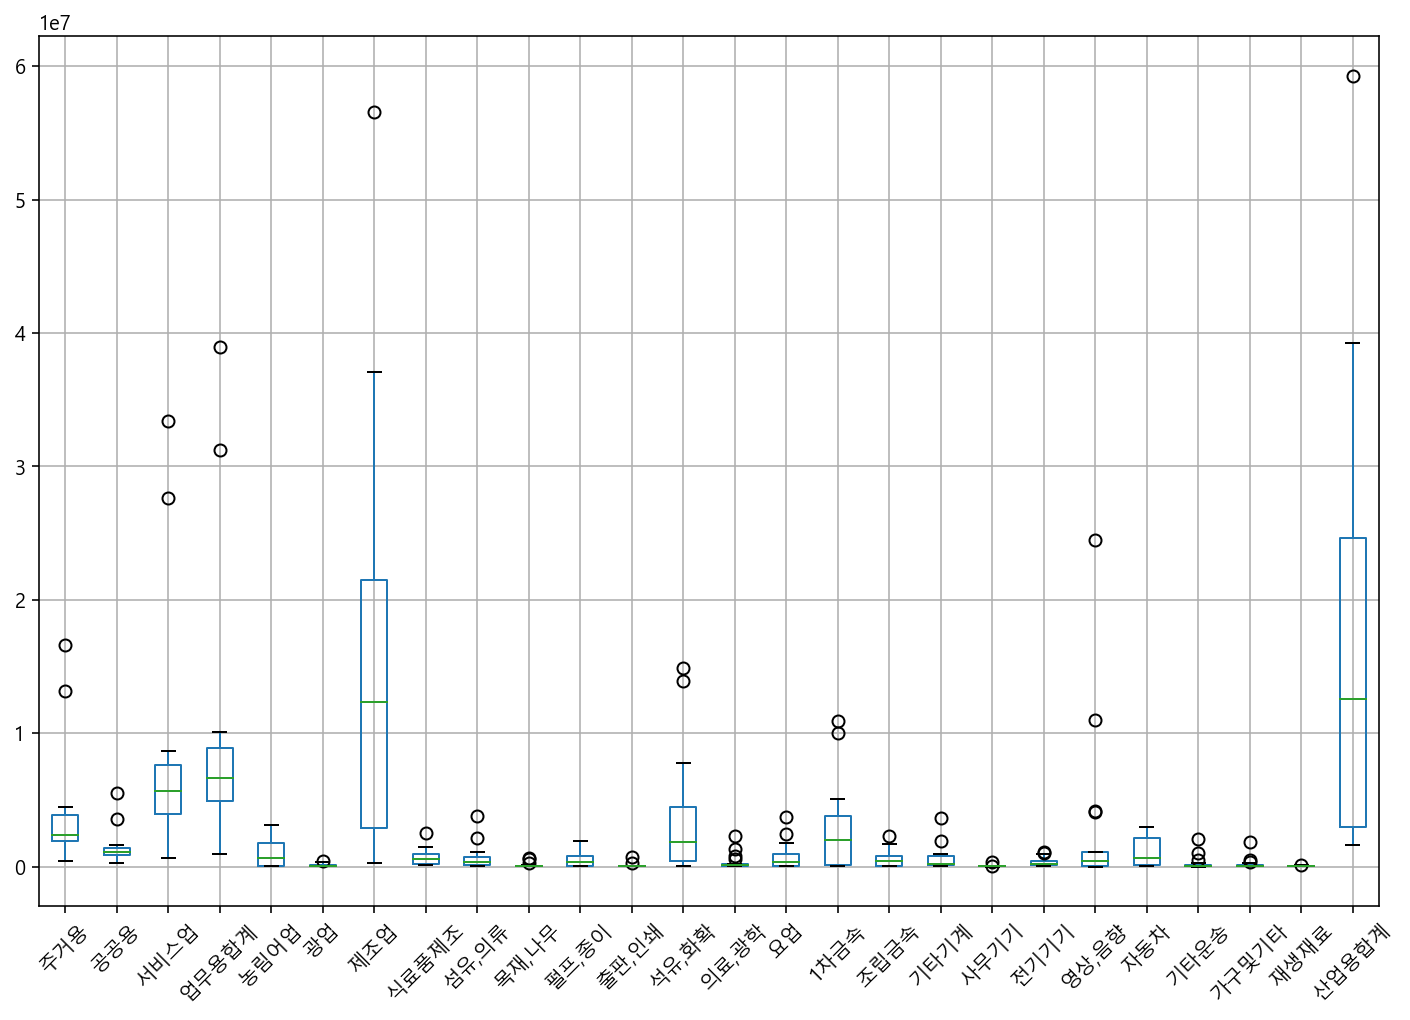

In [82]:
power.boxplot(figsize=(12,8))
plt.xticks(rotation=45)

<AxesSubplot:ylabel='구분'>

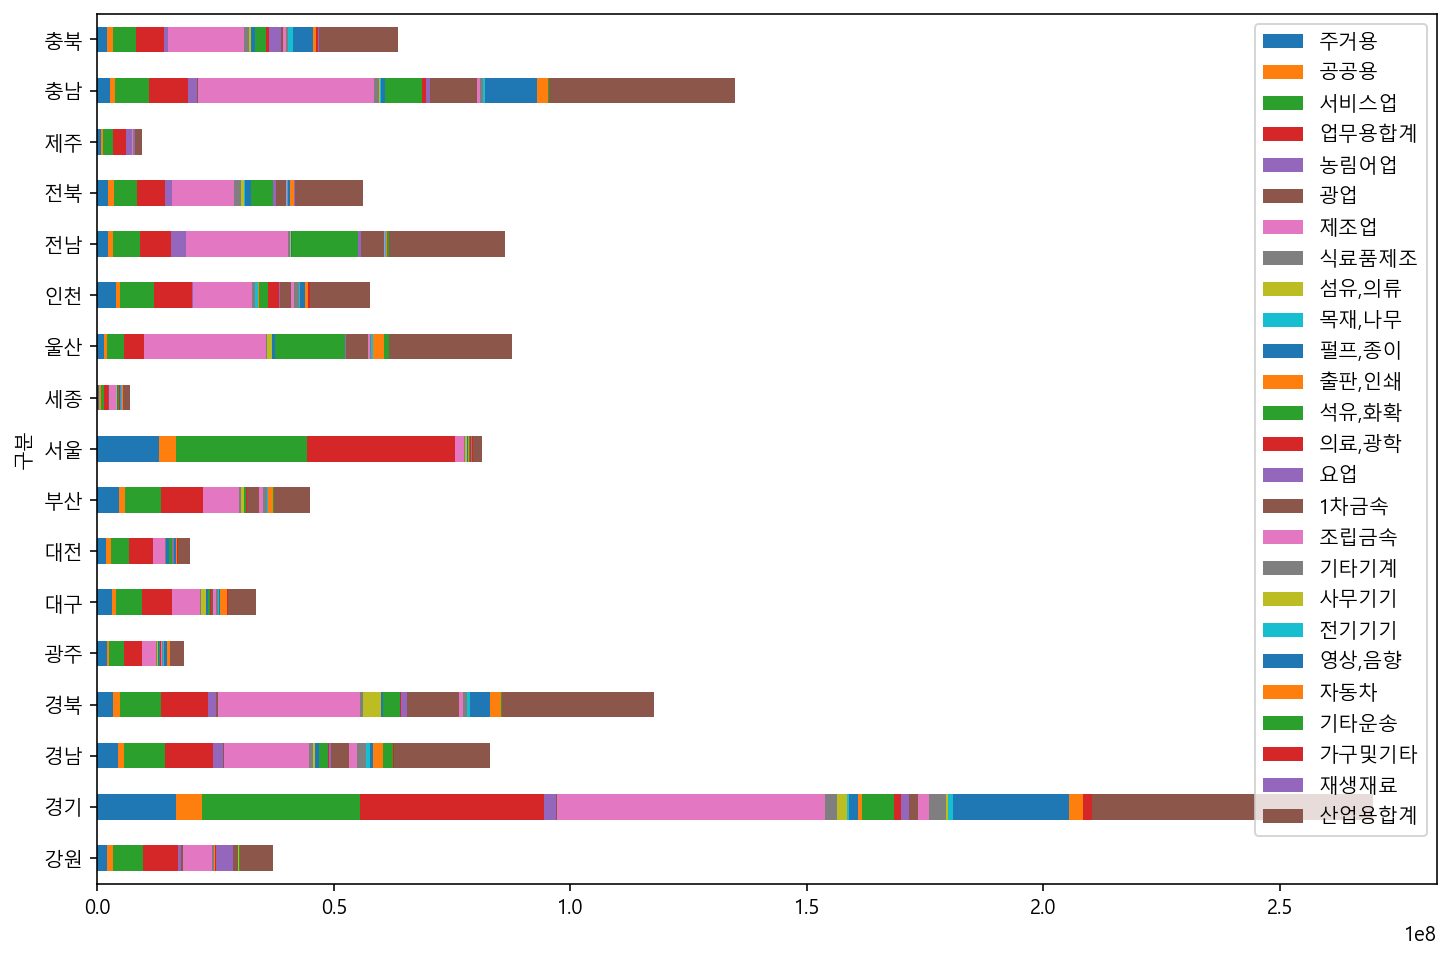

In [83]:
power.plot(kind='barh', figsize=(12, 8), stacked=True)

<AxesSubplot:ylabel='구분'>

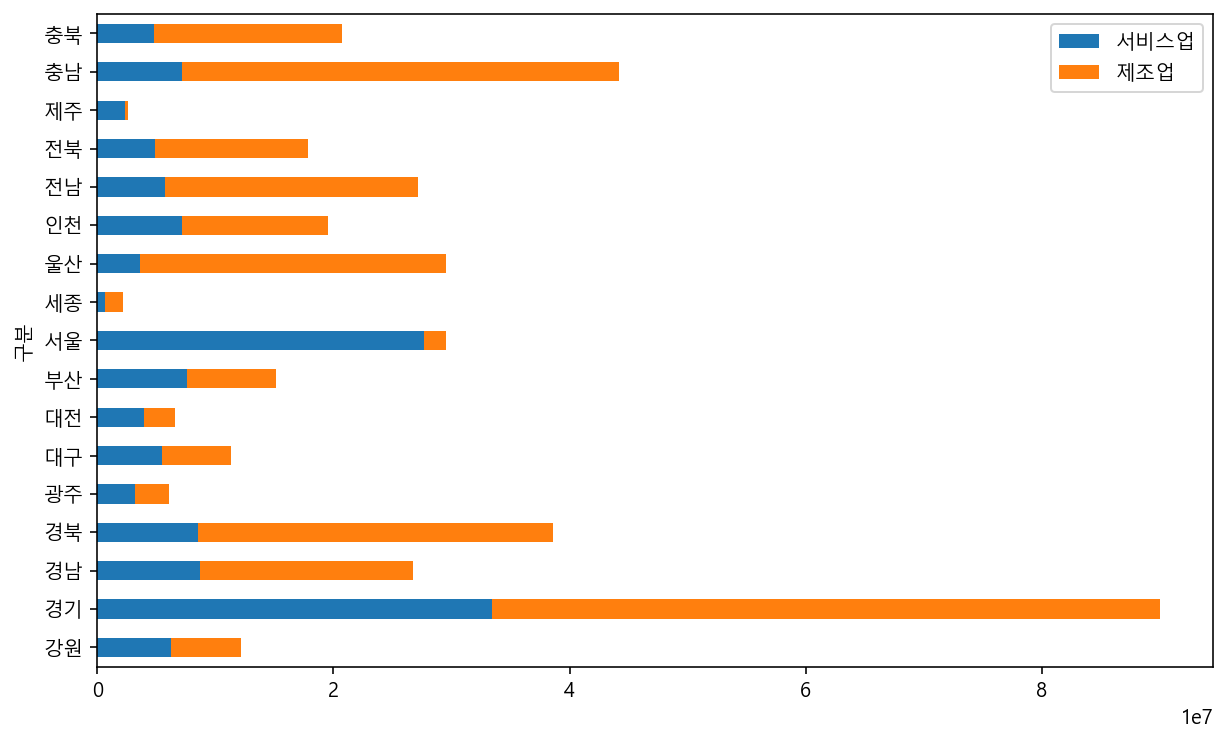

In [84]:
features = ['서비스업', '제조업']
power[features].plot(kind='barh', figsize=(10, 6), stacked=True)

In [85]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


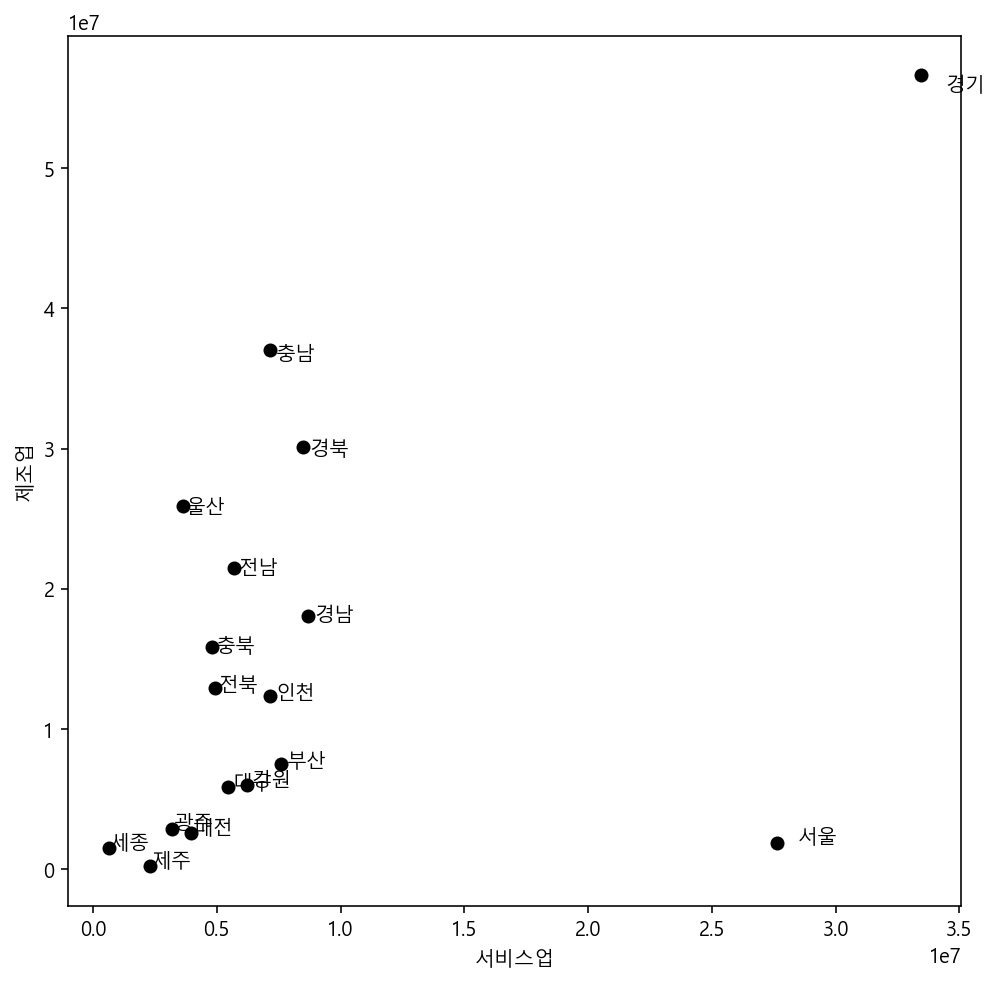

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98 , power.index[n])

In [87]:
power = power.drop(['경기', '서울'])

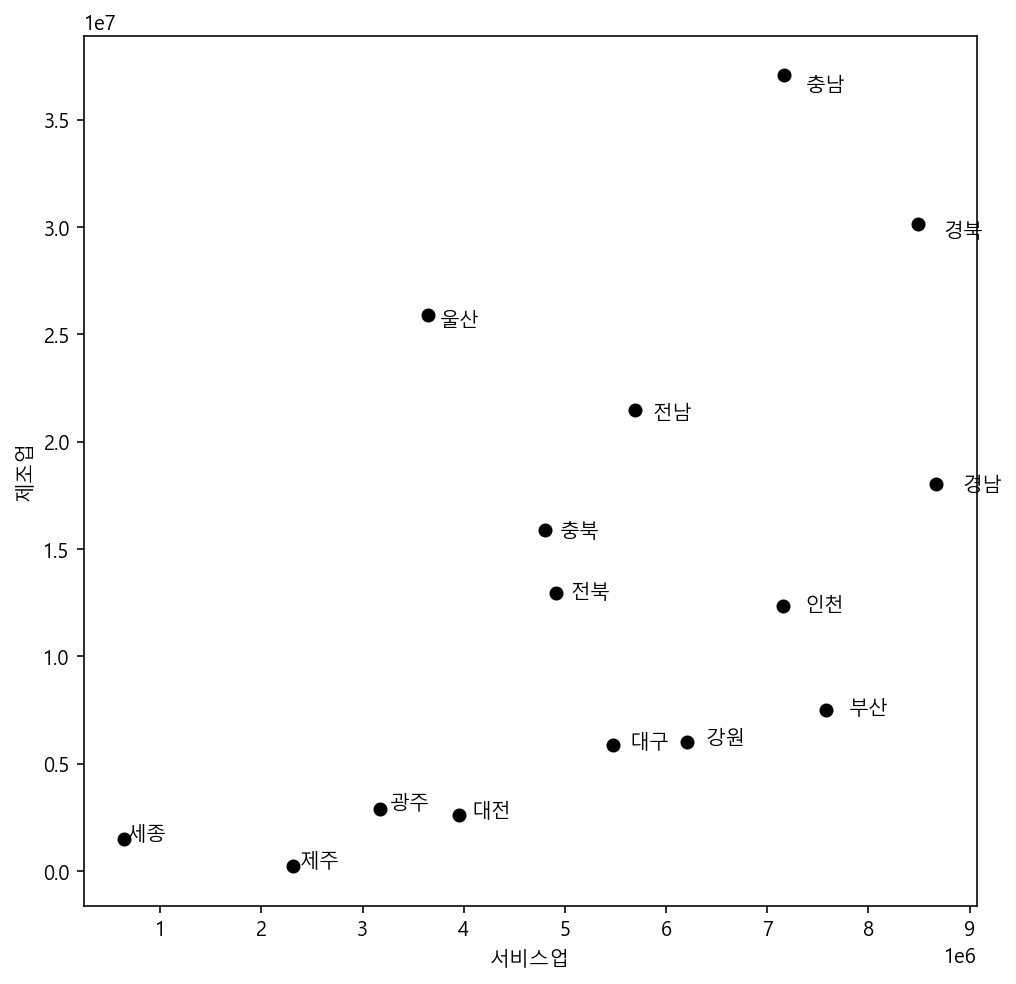

In [88]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98 , power.index[n])

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

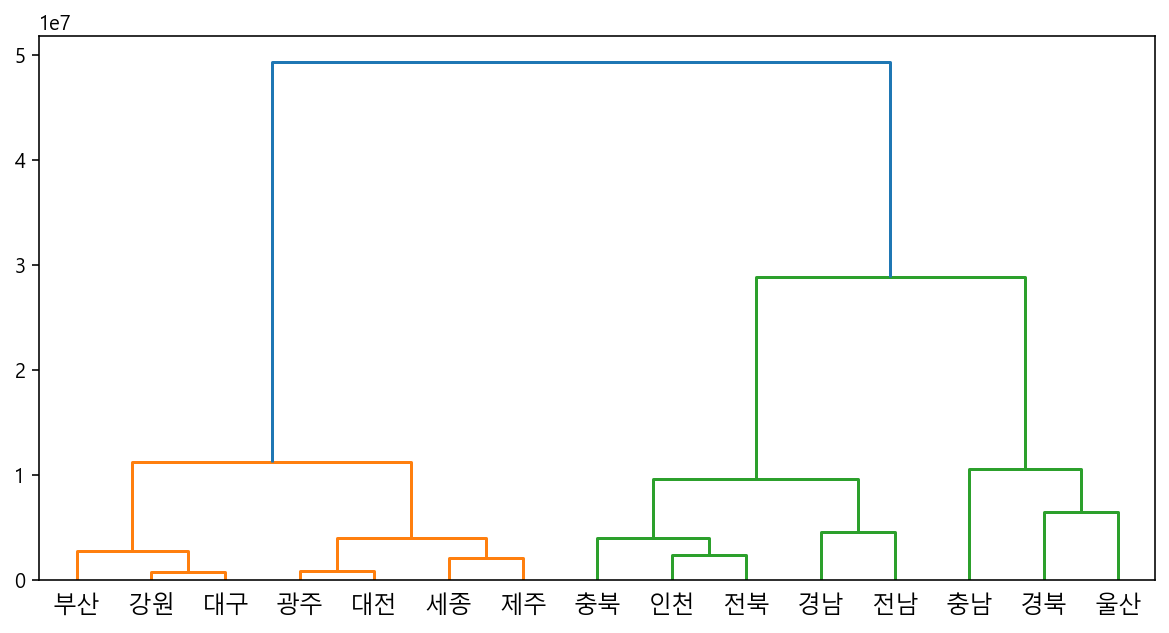

In [90]:
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power.index)
plt.show()

In [91]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=4).fit(power)
print(k.n_clusters)

4


In [92]:
k.labels_

array([0, 2, 3, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 3, 2])

In [93]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,2
경북,8487402,30115601,3
광주,3174973,2910768,0
대구,5470438,5862633,0
대전,3955921,2608343,0
부산,7582169,7512588,0
세종,645424,1502922,0
울산,3649386,25883132,1


In [94]:
centers = k.cluster_centers_ ; centers

array([[ 4191629.42857143,  3805868.14285714],
       [ 4670022.5       , 23668529.        ],
       [ 6384277.25      , 14817729.25      ],
       [ 7825920.5       , 33586778.        ]])

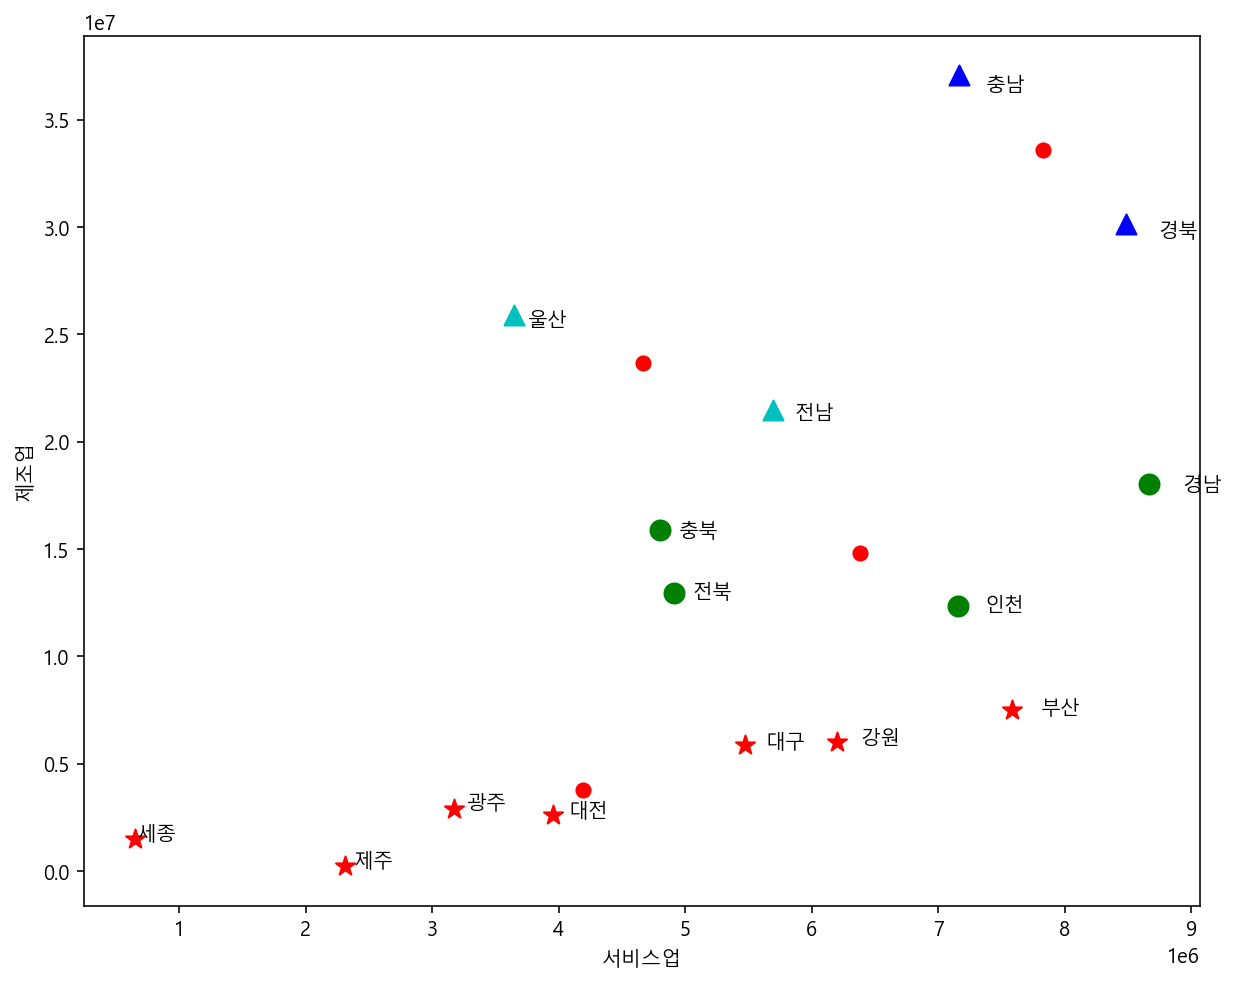

In [95]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

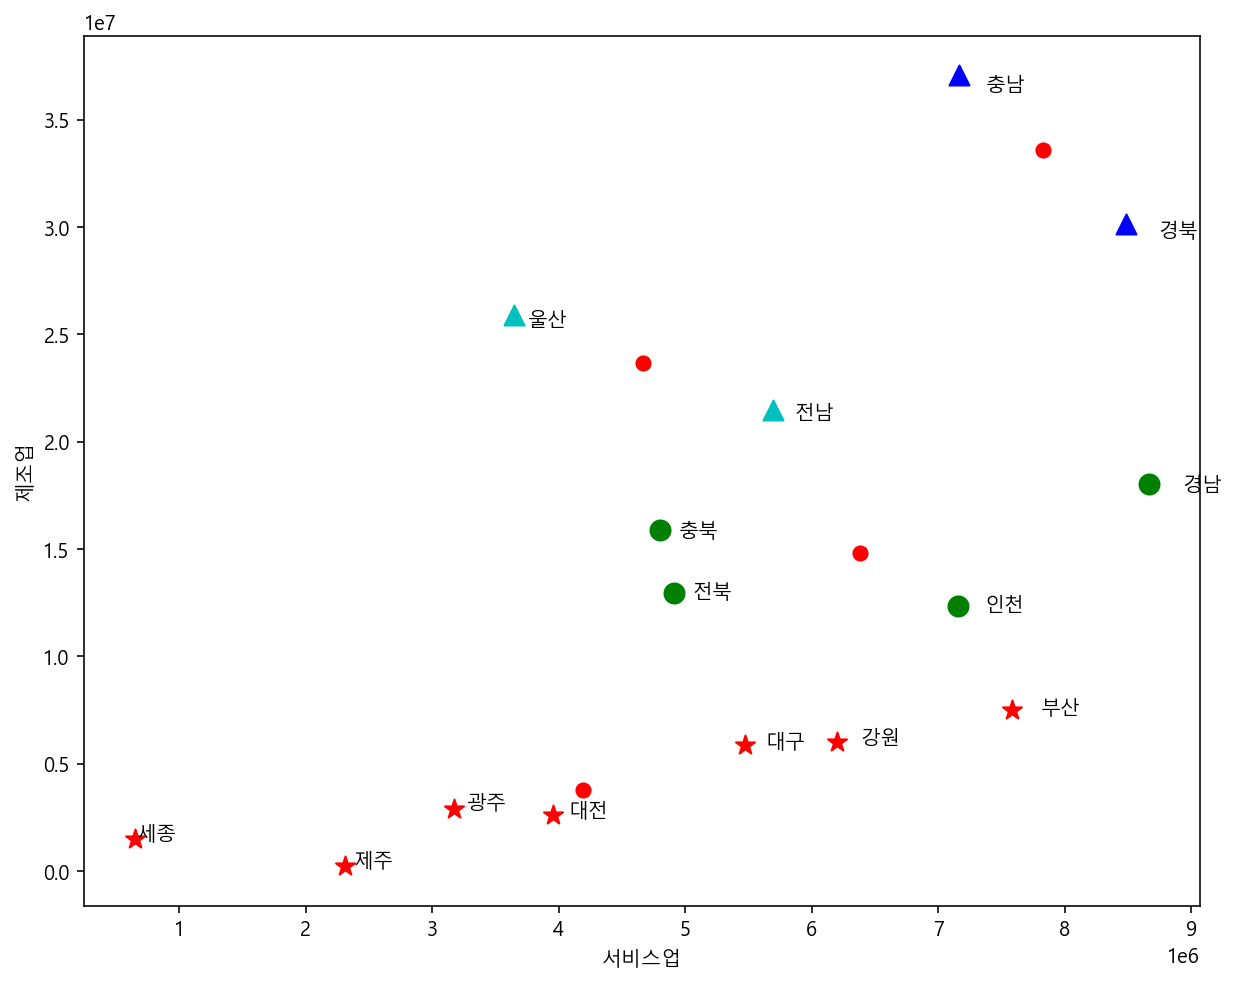

In [96]:
my_markers=['*','^','o','^','.',',','2','1']
my_color =['r','c','g','b','k','r','y']
plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n] , power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03 , power['제조업'][n]*0.98, power.index[n])
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [97]:
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [98]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계','산업용합계','합계'],axis=1,
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True, errors='ignore')

In [99]:
power2

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,...,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,...,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,...,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,...,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626
